In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.set_option('display.float_format', '{:.2f}'.format)

In [148]:
#from google.colab import drive
#drive.mount('/content/drive')

In [149]:
df = pd.read_csv("./df_completo_SHIFT.csv")

C:\Users\mirei\AppData\Local\Temp\ipykernel_11684\4058170636.py:1: DtypeWarning: Columns (28,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./df_completo_SHIFT.csv")


## Exploratory Data Analysis and Data Preparation 

In [150]:
df.head().T

,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
CUST_entry_date,2018-01-01,2015-08-01,2015-08-01,2015-08-01,2015-08-01
CUST_entry_channel,KHL,KHE,KHE,KHD,KHE
CUST_active_customer,1.00,0.00,0.00,0.00,1.00
CUST_segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
PROD_short_term_deposit_lag1,0.00,0.00,0.00,0.00,0.00
PROD_loans_lag1,0.00,0.00,0.00,0.00,0.00
PROD_mortgage_lag1,0.00,0.00,0.00,0.00,0.00
PROD_funds_lag1,0.00,0.00,0.00,0.00,0.00


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001003 entries, 0 to 6001002
Data columns (total 37 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   pk_cid                        int64  
 1   pk_partition                  object 
 2   CUST_entry_date               object 
 3   CUST_entry_channel            object 
 4   CUST_active_customer          float64
 5   CUST_segment                  object 
 6   PROD_short_term_deposit_lag1  float64
 7   PROD_loans_lag1               float64
 8   PROD_mortgage_lag1            float64
 9   PROD_funds_lag1               float64
 10  PROD_securities_lag1          float64
 11  PROD_long_term_deposit_lag1   float64
 12  PROD_em_account_pp_lag1       float64
 13  PROD_credit_card_lag1         float64
 14  PROD_payroll_lag1             float64
 15  PROD_pension_plan_lag1        float64
 16  PROD_payroll_account_lag1     float64
 17  PROD_emc_account_lag1         float64
 18  PROD_debit_card_lag1  

### Preliminary Adjustment of Feature Data Types

In [152]:
#Function to extract lists by data type
target_col = ['HAY_VENTA']

def obtener_lista_variables(dataset):
  lista_numericas = []
  lista_boolean = []
  lista_categoricas = []

  for i in dataset:
    if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and dataset[i].nunique() > 2 and i not in target_col:
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and  dataset[i].nunique() <= 2 and  i not in target_col:
      lista_boolean.append(i)
    elif dataset[i].dtype.kind == "O" and i not in target_col:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [153]:
#creating the lists by datatype
num, bol, cat = obtener_lista_variables(df)

In [154]:
#numerical data list
num
# pk_cid should be categorical
# CUST_SOCDEM_region_code should also be categorical
# SALE_pk_sale and SALE_product_ID also, but it doesn't matter because we will remove them for the model.


['pk_cid',
 'CUST_SOCDEM_region_code',
 'CUST_SOCDEM_age',
 'CUST_SOCDEM_salary',
 'SALE_pk_sale',
 'SALE_product_ID',
 'SALE_net_margin',
 'antiguedad_cliente_meses']

In [155]:
#converting "pk_cid", "CUST_SOCDEM_region_code","SALE_pk_sale", "SALE_product_ID" to categorical type. 
num_a_cat= ["pk_cid", "CUST_SOCDEM_region_code","SALE_pk_sale", "SALE_product_ID" ]

In [156]:
for i in num_a_cat:
  df[i] = df[i].astype("object")

In [157]:
df[num_a_cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001003 entries, 0 to 6001002
Data columns (total 4 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   pk_cid                   object
 1   CUST_SOCDEM_region_code  object
 2   SALE_pk_sale             object
 3   SALE_product_ID          object
dtypes: object(4)
memory usage: 183.1+ MB


### Univariate analysis, erroneous data, outliers

In [158]:
df1 = df.copy()

In [159]:
#Extract list by data type again
num1, bol1, cat1 = obtener_lista_variables(df1)

In [160]:
num1

['CUST_SOCDEM_age',
 'CUST_SOCDEM_salary',
 'SALE_net_margin',
 'antiguedad_cliente_meses']

In [161]:
#exploring numerical data
df1[num1].describe(percentiles=[.1, .25, .5, .75, .9])


,CUST_SOCDEM_age,CUST_SOCDEM_salary,SALE_net_margin,antiguedad_cliente_meses
count,6001003.00,4446774.00,240773.00,6001003.00
mean,29.80,115582.75,606.88,20.33
std,11.99,199762.15,1735.81,13.15
min,2.00,1202.73,25.00,0.00
10%,21.00,44529.99,56.20,3.00
25%,22.00,61413.48,61.40,9.00
50%,25.00,88446.63,69.10,19.00
75%,34.00,131327.91,79.20,31.00
90%,47.00,197986.83,1494.20,40.00
max,105.00,28894395.51,18466.40,53.00


In [162]:
'''
for col in num1:
    plt.figure(figsize=(10, 20))
    sns.boxplot(data=df1[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()
'''

"\nfor col in num1:\n    plt.figure(figsize=(10, 20))\n    sns.boxplot(data=df1[col])\n    plt.title(f'Boxplot de {col}')\n    plt.ylabel(col)\n    plt.ticklabel_format(style='plain', axis='y')\n    plt.show()\n"

[[<Axes: title={'center': 'CUST_SOCDEM_age'}>]]
[[<Axes: title={'center': 'CUST_SOCDEM_salary'}>]]
[[<Axes: title={'center': 'SALE_net_margin'}>]]
[[<Axes: title={'center': 'antiguedad_cliente_meses'}>]]


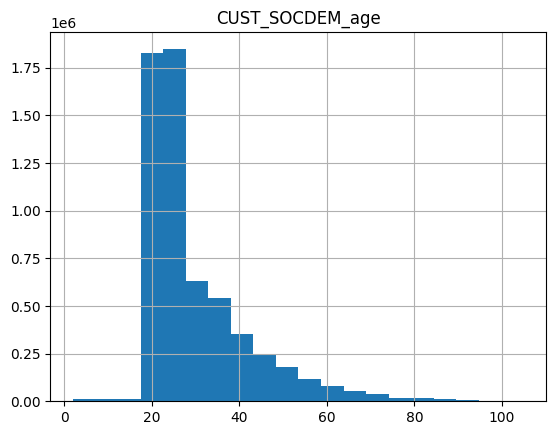

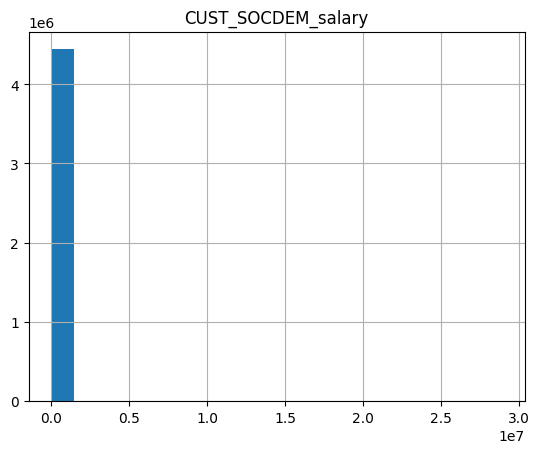

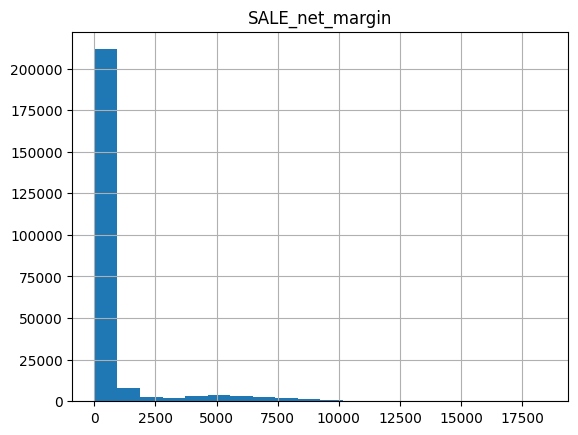

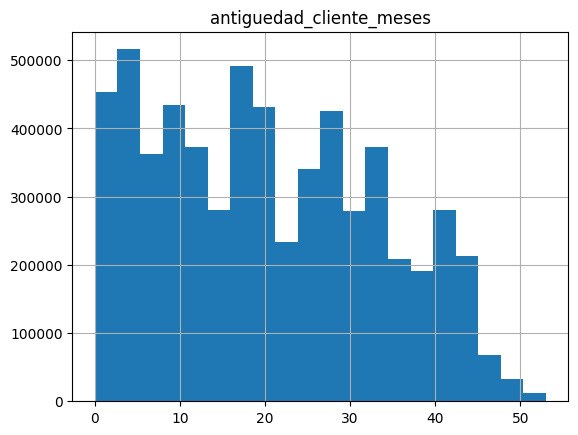

In [163]:

for i in num1:
  print(df1.hist([i], bins = 20))

In [164]:
bol1

['CUST_active_customer',
 'PROD_short_term_deposit_lag1',
 'PROD_loans_lag1',
 'PROD_mortgage_lag1',
 'PROD_funds_lag1',
 'PROD_securities_lag1',
 'PROD_long_term_deposit_lag1',
 'PROD_em_account_pp_lag1',
 'PROD_credit_card_lag1',
 'PROD_payroll_lag1',
 'PROD_pension_plan_lag1',
 'PROD_payroll_account_lag1',
 'PROD_emc_account_lag1',
 'PROD_debit_card_lag1',
 'PROD_em_account_p_lag1',
 'PROD_em_acount_lag1',
 'nuevo_cliente']

In [165]:
cat1

['pk_cid',
 'pk_partition',
 'CUST_entry_date',
 'CUST_entry_channel',
 'CUST_segment',
 'CUST_SOCDEM_country_id',
 'CUST_SOCDEM_region_code',
 'CUST_SOCDEM_gender',
 'CUST_SOCDEM_deceased',
 'SALE_pk_sale',
 'SALE_month_sale',
 'SALE_product_ID',
 'SALE_product_desc',
 'SALE_family_product',
 'provincia']

In [166]:
#Analysis of bool and cat
#Column "deceased"??? I would remove it.
for col in cat1+bol1:
  print(f"{df1[col].value_counts(dropna=False)}\n\n")

pk_cid
1350784    22
1141434    22
1336881    21
1017164    21
1297718    21
           ..
1446539     1
1521433     1
1521404     1
1445837     1
1550586     1
Name: count, Length: 456373, dtype: int64


pk_partition
2019-05-01    445310
2019-04-01    441792
2019-03-01    438528
2019-02-01    434004
2019-01-01    428756
2018-12-01    425478
2018-11-01    419101
2018-10-01    404826
2018-09-01    377359
2018-08-01    355236
2018-07-01    342297
2018-06-01    254341
2018-05-01    251799
2018-04-01    249451
2018-03-01    247521
2018-02-01    245711
2018-01-01    239493
Name: count, dtype: int64


CUST_entry_date
2016-10-01    383465
2017-10-01    341984
2015-10-01    311134
2017-09-01    295737
2017-07-01    267986
2016-08-01    253337
2015-08-01    222531
2015-07-01    221470
2017-11-01    218807
2018-10-01    218759
2015-09-01    217729
2015-11-01    211273
2016-09-01    206789
2018-09-01    204022
2016-07-01    189850
2016-11-01    189258
2018-07-01    179563
2017-08-01    163173
201

In [167]:
#Check if there are sales for deceased: there are. I would remove the column, not the records.
df1[df1["HAY_VENTA"] == 1]["CUST_SOCDEM_deceased"].value_counts()

CUST_SOCDEM_deceased
N    240752
S        21
Name: count, dtype: int64

In [168]:
#Check if CUST_SOCDEM_deceased are CUST_active_customer or not.
df1[df1["CUST_SOCDEM_deceased"] == "S"]["CUST_active_customer"].value_counts()

CUST_active_customer
1.00    719
0.00    357
Name: count, dtype: int64

In [169]:
df1.drop("CUST_SOCDEM_deceased", axis = 1, inplace = True)

In [170]:
#Check that the CUST_SOCDEM_country_id that are not "ES" correspond to null province (CUST_SOCDEM_region_code)
df1[df1["CUST_SOCDEM_country_id"] != "ES"]
#There are 2260 records from outside Spain

,pk_cid,pk_partition,CUST_entry_date,CUST_entry_channel,CUST_active_customer,CUST_segment,PROD_short_term_deposit_lag1,PROD_loans_lag1,PROD_mortgage_lag1,PROD_funds_lag1,...,SALE_pk_sale,SALE_month_sale,SALE_product_ID,SALE_net_margin,SALE_product_desc,SALE_family_product,nuevo_cliente,antiguedad_cliente_meses,HAY_VENTA,provincia
2022,1050073,2018-01-01,2015-08-01,KAT,1.00,01 - TOP,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
4121,1052929,2018-01-01,2015-08-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
4320,1054714,2018-01-01,2015-08-01,KAT,1.00,01 - TOP,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
5874,1044441,2018-01-01,2015-08-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
15144,1058997,2018-01-01,2015-09-01,KFA,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,28,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996310,1173247,2019-05-01,2016-09-01,KAT,0.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,32,0,NaN
5996878,1171742,2019-05-01,2016-09-01,KFC,1.00,01 - TOP,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,32,0,NaN
5999631,1167439,2019-05-01,2016-08-01,KAT,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,33,0,NaN
5999863,1168237,2019-05-01,2016-08-01,KAT,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,33,0,NaN


In [171]:
df1[df1["CUST_SOCDEM_region_code"].isnull()]
# There are 2272 records without a province code.

,pk_cid,pk_partition,CUST_entry_date,CUST_entry_channel,CUST_active_customer,CUST_segment,PROD_short_term_deposit_lag1,PROD_loans_lag1,PROD_mortgage_lag1,PROD_funds_lag1,...,SALE_pk_sale,SALE_month_sale,SALE_product_ID,SALE_net_margin,SALE_product_desc,SALE_family_product,nuevo_cliente,antiguedad_cliente_meses,HAY_VENTA,provincia
2022,1050073,2018-01-01,2015-08-01,KAT,1.00,01 - TOP,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
4121,1052929,2018-01-01,2015-08-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
4320,1054714,2018-01-01,2015-08-01,KAT,1.00,01 - TOP,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
5874,1044441,2018-01-01,2015-08-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,29,0,NaN
15144,1058997,2018-01-01,2015-09-01,KFA,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,28,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996310,1173247,2019-05-01,2016-09-01,KAT,0.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,32,0,NaN
5996878,1171742,2019-05-01,2016-09-01,KFC,1.00,01 - TOP,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,32,0,NaN
5999631,1167439,2019-05-01,2016-08-01,KAT,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,33,0,NaN
5999863,1168237,2019-05-01,2016-08-01,KAT,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,33,0,NaN


In [172]:
#2272-2260 = There are 12 records that don't have a province code but are in Spain. It seems to be just one customer. I will remove all records of this customer.
df1[(df1["CUST_SOCDEM_region_code"].isnull()) & (df1["CUST_SOCDEM_country_id"] == "ES")]

,pk_cid,pk_partition,CUST_entry_date,CUST_entry_channel,CUST_active_customer,CUST_segment,PROD_short_term_deposit_lag1,PROD_loans_lag1,PROD_mortgage_lag1,PROD_funds_lag1,...,SALE_pk_sale,SALE_month_sale,SALE_product_ID,SALE_net_margin,SALE_product_desc,SALE_family_product,nuevo_cliente,antiguedad_cliente_meses,HAY_VENTA,provincia
215020,1234433,2018-01-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,13,0,NaN
276944,1234433,2018-02-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,65734.00,2018-02-01,2235.00,64.20,payroll_account,account,0,14,1,NaN
521458,1234433,2018-03-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,15,0,NaN
765974,1234433,2018-04-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,16,0,NaN
1199323,1234433,2018-05-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,17,0,NaN
1453451,1234433,2018-06-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,18,0,NaN
1758162,1234433,2018-07-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,19,0,NaN
2130113,1234433,2018-08-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,20,0,NaN
2273404,1234433,2018-09-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,21,0,NaN
2885536,1234433,2018-10-01,2016-12-01,KFC,1.00,02 - PARTICULARES,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,22,0,NaN


In [173]:
df1[(df1["pk_cid"] == 1234433)].T

,215020,276944,521458,765974,1199323,1453451,1758162,2130113,2273404,2885536,3067298,3507852,4085676,4310742,4996047,5447862,5941963
pk_cid,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433,1234433
pk_partition,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01
CUST_entry_date,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01,2016-12-01
CUST_entry_channel,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC,KFC
CUST_active_customer,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
CUST_segment,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES,02 - PARTICULARES
PROD_short_term_deposit_lag1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PROD_loans_lag1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PROD_mortgage_lag1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PROD_funds_lag1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [174]:
df1.loc[df1["pk_cid"] == 1234433, "provincia"] = "Castellón/Castelló"
df1.loc[df1["pk_cid"] == 1234433, "CUST_SOCDEM_region_code"] = 12.00

In [175]:
#Check that there are no records with country code "ES" that don't have a province code.
df1[(df1["CUST_SOCDEM_region_code"].isnull()) & (df1["CUST_SOCDEM_country_id"] == "ES")]

,pk_cid,pk_partition,CUST_entry_date,CUST_entry_channel,CUST_active_customer,CUST_segment,PROD_short_term_deposit_lag1,PROD_loans_lag1,PROD_mortgage_lag1,PROD_funds_lag1,...,SALE_pk_sale,SALE_month_sale,SALE_product_ID,SALE_net_margin,SALE_product_desc,SALE_family_product,nuevo_cliente,antiguedad_cliente_meses,HAY_VENTA,provincia


In [176]:
#Remove the records where PROD_em_account_p is equal to 1 and remove the columns PROD_em_account_p and PROD_em_account_pp. Remove all records of those customers.
df1[(df1["PROD_em_account_p_lag1"] == 1)]["pk_cid"].value_counts()


pk_cid
645092    18
313778    16
Name: count, dtype: int64

In [177]:
indices_a_eliminar3 = df[(df["pk_cid"] == 645092) | (df["pk_cid"] == 313778)].index
len(indices_a_eliminar3)

36

In [178]:
df1.drop(indices_a_eliminar3, inplace = True)

In [179]:
df1.drop(["PROD_em_account_p_lag1", "PROD_em_account_pp_lag1"], axis = 1, inplace = True)

### Handling missing values

In [180]:
df2 = df1.copy()

In [181]:
df2.isnull().sum()
# Missing values in SALE columns: If there wasn't a sale in a specific month made by a specific client, there is no SALE data for this record.
# For now, I will leave the missing data as it is.

pk_cid                                0
pk_partition                          0
CUST_entry_date                       0
CUST_entry_channel               135424
CUST_active_customer                  0
CUST_segment                     136379
PROD_short_term_deposit_lag1          0
PROD_loans_lag1                       0
PROD_mortgage_lag1                    0
PROD_funds_lag1                       0
PROD_securities_lag1                  0
PROD_long_term_deposit_lag1           0
PROD_credit_card_lag1                 0
PROD_payroll_lag1                     0
PROD_pension_plan_lag1                0
PROD_payroll_account_lag1             0
PROD_emc_account_lag1                 0
PROD_debit_card_lag1                  0
PROD_em_acount_lag1                   0
CUST_SOCDEM_country_id                0
CUST_SOCDEM_region_code            2260
CUST_SOCDEM_gender                   25
CUST_SOCDEM_age                       0
CUST_SOCDEM_salary              1554229
SALE_pk_sale                    5760199


In [182]:
# Missing values  in the partition where target = 1

df[df["HAY_VENTA"] == 1].isnull().sum()



pk_cid                               0
pk_partition                         0
CUST_entry_date                      0
CUST_entry_channel               78901
CUST_active_customer                 0
CUST_segment                     79272
PROD_short_term_deposit_lag1         0
PROD_loans_lag1                      0
PROD_mortgage_lag1                   0
PROD_funds_lag1                      0
PROD_securities_lag1                 0
PROD_long_term_deposit_lag1          0
PROD_em_account_pp_lag1              0
PROD_credit_card_lag1                0
PROD_payroll_lag1                    0
PROD_pension_plan_lag1               0
PROD_payroll_account_lag1            0
PROD_emc_account_lag1                0
PROD_debit_card_lag1                 0
PROD_em_account_p_lag1               0
PROD_em_acount_lag1                  0
CUST_SOCDEM_country_id               0
CUST_SOCDEM_region_code             79
CUST_SOCDEM_gender                   3
CUST_SOCDEM_age                      0
CUST_SOCDEM_deceased     

In [183]:
len(df2[df2["provincia"].isnull() & df2["CUST_SOCDEM_region_code"].isnull()])

2260

In [184]:
df2[df2["provincia"].isnull() & df2["CUST_SOCDEM_region_code"].isnull()]["CUST_SOCDEM_country_id"].value_counts()

CUST_SOCDEM_country_id
GB    444
FR    228
DE    199
US    196
CH    195
BR     87
BE     81
VE     79
IE     68
MX     58
AT     51
AR     51
PL     49
IT     45
MA     34
CL     30
CN     28
CA     22
CI     17
SA     17
QA     17
ET     17
LU     17
CM     17
RU     17
MR     17
SN     17
NO     17
CO     17
GA     17
GT     17
DO     17
SE     16
DJ     11
PT     11
JM     11
RO      9
HU      8
DZ      7
PE      4
Name: count, dtype: int64

In [185]:
# Missing values in  "provincia" and CUST_SOCDEM_region_code: Any of them has CUST_SOCDEM_country_id == ES ->  replace with "otro_pais" ("other country"). 
df2["provincia"].fillna("otro_pais", inplace = True)
df2["CUST_SOCDEM_region_code"].fillna("otro_pais", inplace = True)

# Missing values in PROD_pension_plan and PROD_payroll: replace with zero (The client doesn´t have these products)
df2["PROD_payroll_lag1"].fillna(0, inplace = True)
df2["PROD_pension_plan_lag1"].fillna(0, inplace = True)

# Missing values in CUST_SOCDEM_gender: there are very few, and only 3 of them where TARGET == 1,   so I will eliminate the records entirely.
df2.dropna(subset = "CUST_SOCDEM_gender", inplace = True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_11684\2812357836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["provincia"].fillna("otro_pais", inplace = True)
C:\Users\mirei\AppData\Local\Temp\ipykernel_11684\2812357836.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [186]:
# Missing values in CUST_segment and CUST_entry_channel:
# Some of the missing data in CUST_segment and CUST_entry_channel is present only in the first pk_partition of certain clients.
# I replace this missing data with the most frequent CUST_segment and CUST_entry_channel values for each client,
# which are consistent for that specific client in the rest of the pk_partitions.

In [187]:
df2["CUST_segment"].value_counts(dropna = False)

CUST_segment
03 - UNIVERSITARIO    3911356
02 - PARTICULARES     1853963
NaN                    136378
01 - TOP                99245
Name: count, dtype: int64

In [188]:
#df2['CUST_segment'] = df2.groupby("pk_cid")['CUST_segment'].fillna(method='bfill')
# This takes a lot of time. 

In [189]:
most_frequent_segment = df2.groupby('pk_cid')['CUST_segment'].value_counts().reset_index()
most_frequent_segment.drop("count", axis = 1, inplace = True)
most_frequent_segment = most_frequent_segment.drop_duplicates(subset='pk_cid', keep='first')
segment_dict = most_frequent_segment.set_index('pk_cid')['CUST_segment'].to_dict()
df2['CUST_segment'] = df2['pk_cid'].map(segment_dict)
df2['CUST_segment'].value_counts(dropna = False)

CUST_segment
03 - UNIVERSITARIO    4002673
02 - PARTICULARES     1883139
01 - TOP               105948
NaN                      9182
Name: count, dtype: int64

In [190]:
df2["CUST_entry_channel"].value_counts(dropna = False)

CUST_entry_channel
KHE    3119967
KFC     897424
KHQ     591241
KAT     419244
KHK     234734
KHM     182923
NaN     135423
KHN     112349
KFA      79799
KHD      75996
RED      62036
KHL      42686
KHF      20792
KHO       8638
KAZ       5674
KHC       5273
KBG       1676
KEH        730
KHP        693
007        615
013        404
KAG        339
KAS        306
KBZ        199
KAA        193
KAR        157
KAY        150
KAF        123
KAB         96
KFD         91
KCC         90
KAW         65
KAQ         52
KAE         51
KDH         51
KCB         49
KCH         48
KAD         45
KAM         43
KAH         40
KAK         34
KAJ         33
KDT         23
KFF         22
KBO         21
KEY         20
KCI         17
KBH         17
KBE         17
KFS         17
KCL         17
KGX         17
KFK         17
KGN         17
KGC         17
004         17
KDR         16
KFL         13
KBW         12
KCK         11
KES         11
KBU         11
KAI         11
KBY         11
KEJ          8
KHS   

In [191]:
most_frequent_segment = df2.groupby('pk_cid')['CUST_entry_channel'].value_counts().reset_index()
most_frequent_segment.drop("count", axis = 1, inplace = True)
most_frequent_segment = most_frequent_segment.drop_duplicates(subset='pk_cid', keep='first')
segment_dict = most_frequent_segment.set_index('pk_cid')['CUST_entry_channel'].to_dict()
df2['CUST_entry_channel'] = df2['pk_cid'].map(segment_dict)
df2['CUST_entry_channel'].value_counts(dropna = False)

CUST_entry_channel
KHE    3120406
KFC     898506
KHQ     666932
KAT     419785
KHK     235908
KHM     212066
KHN     126527
KFA      80308
KHD      76026
RED      63803
KHL      42780
KHF      20841
KHO       9773
NaN       9449
KAZ       5681
KHC       5273
KBG       1685
KHP        778
KEH        730
007        617
013        416
KAG        343
KAS        308
KBZ        199
KAA        193
KAY        171
KAR        157
KAF        123
KAB         94
KFD         91
KCC         89
KAW         65
KAQ         52
KDH         51
KAE         51
KCB         49
KCH         48
KAD         45
KAM         43
KAH         40
KAK         34
KAJ         33
KDT         23
KFF         22
KBO         21
KEY         20
KGN         17
KCI         17
KBH         17
KFK         17
KFS         17
KGC         17
004         17
KBE         17
KCL         17
KGX         17
KDR         16
KFL         13
KBW         12
KCK         11
KES         11
KBU         11
KAI         11
KBY         11
KHS         10
KEJ   

In [192]:
df2.shape


(6000942, 34)

In [193]:
# Replacing the remaining missing values in  CUST_entry_channel and CUST_segment with "desconocido" ("unknown")
df2["CUST_entry_channel"].fillna("desconocido", inplace = True)
df2["CUST_segment"].fillna("desconocido", inplace = True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_11684\2117249945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["CUST_entry_channel"].fillna("desconocido", inplace = True)
C:\Users\mirei\AppData\Local\Temp\ipykernel_11684\2117249945.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [194]:
#Missing values in salary: replace with the median (not the mean) by region, gender and age. 
# I use the median instead of the mean to replace missing values because the distribution is not normal.


In [ ]:
# Creating new column "grupos_edad" (age groups)
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']


df2['grupo_edad'] = pd.cut(df['CUST_SOCDEM_age'], bins=bins, labels=labels, right=True)

In [196]:
df2.head().T

,0,1,2,3,4
pk_cid,1375586,1050611,1050612,1050613,1050614
pk_partition,2018-01-01,2018-01-01,2018-01-01,2018-01-01,2018-01-01
CUST_entry_date,2018-01-01,2015-08-01,2015-08-01,2015-08-01,2015-08-01
CUST_entry_channel,KHL,KHE,KHE,KHD,KHE
CUST_active_customer,1.00,0.00,0.00,0.00,1.00
CUST_segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
PROD_short_term_deposit_lag1,0.00,0.00,0.00,0.00,0.00
PROD_loans_lag1,0.00,0.00,0.00,0.00,0.00
PROD_mortgage_lag1,0.00,0.00,0.00,0.00,0.00
PROD_funds_lag1,0.00,0.00,0.00,0.00,0.00


In [197]:
df2.shape

(6000942, 35)

In [209]:
# Replacing the missing values with the median by region, age_group and customer segment. 

df2['CUST_SOCDEM_salary'] = df2.groupby(["CUST_SOCDEM_region_code", "grupo_edad", "CUST_segment"])['CUST_SOCDEM_salary'].transform(lambda x: x.fillna(x.median()))

C:\Users\mirei\AppData\Local\Temp\ipykernel_11684\3241637872.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['CUST_SOCDEM_salary'] = df2.groupby(["CUST_SOCDEM_region_code", "grupo_edad", "CUST_segment"])['CUST_SOCDEM_salary'].transform(lambda x: x.fillna(x.median()))
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty s

In [210]:
df2['CUST_SOCDEM_salary'].isnull().sum()

34990

In [211]:
# replace the remaining nulls with the median by "CUST_SOCDEM_region_code",  "CUST_segment"

df2['CUST_SOCDEM_salary'] = df2.groupby(["CUST_SOCDEM_region_code",  "CUST_segment"])['CUST_SOCDEM_salary'].transform(lambda x: x.fillna(x.median()))

c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\m

In [212]:
df2['CUST_SOCDEM_salary'].isnull().sum()

3685

In [213]:
# replace the remaining nulls with the median by "CUST_SOCDEM_region_code"

df2['CUST_SOCDEM_salary'] = df2.groupby(["CUST_SOCDEM_region_code"])['CUST_SOCDEM_salary'].transform(lambda x: x.fillna(x.median()))

In [214]:
df2['CUST_SOCDEM_salary'].isnull().sum()

0

In [ ]:
# Distribution BEFORE replacing missing values
df1["CUST_SOCDEM_salary"].describe()


count    4446738.00
mean      115582.35
std       199762.72
min         1202.73
25%        61413.32
50%        88446.63
75%       131327.91
max     28894395.51
Name: CUST_SOCDEM_salary, dtype: float64

In [218]:
# Checking that the distribution has not changed significantly after replacing the missing values in CUST_SOCDEM_salary. They are not identical but remain very similar.
df2["CUST_SOCDEM_salary"].describe()

count    6000942.00
mean      109811.46
std       172833.14
min         1202.73
25%        65253.48
50%        88073.82
75%       125183.71
max     28894395.51
Name: CUST_SOCDEM_salary, dtype: float64

In [219]:
df2.isnull().sum()

pk_cid                                0
pk_partition                          0
CUST_entry_date                       0
CUST_entry_channel                    0
CUST_active_customer                  0
CUST_segment                          0
PROD_short_term_deposit_lag1          0
PROD_loans_lag1                       0
PROD_mortgage_lag1                    0
PROD_funds_lag1                       0
PROD_securities_lag1                  0
PROD_long_term_deposit_lag1           0
PROD_credit_card_lag1                 0
PROD_payroll_lag1                     0
PROD_pension_plan_lag1                0
PROD_payroll_account_lag1             0
PROD_emc_account_lag1                 0
PROD_debit_card_lag1                  0
PROD_em_acount_lag1                   0
CUST_SOCDEM_country_id                0
CUST_SOCDEM_region_code               0
CUST_SOCDEM_gender                    0
CUST_SOCDEM_age                       0
CUST_SOCDEM_salary                    0
SALE_pk_sale                    5760177


In [220]:
PROD_col = [col for col in df2.columns if col.startswith('PROD')]
PROD_col

['PROD_short_term_deposit_lag1',
 'PROD_loans_lag1',
 'PROD_mortgage_lag1',
 'PROD_funds_lag1',
 'PROD_securities_lag1',
 'PROD_long_term_deposit_lag1',
 'PROD_credit_card_lag1',
 'PROD_payroll_lag1',
 'PROD_pension_plan_lag1',
 'PROD_payroll_account_lag1',
 'PROD_emc_account_lag1',
 'PROD_debit_card_lag1',
 'PROD_em_acount_lag1']

In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000942 entries, 0 to 6001002
Data columns (total 35 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   pk_cid                        object  
 1   pk_partition                  object  
 2   CUST_entry_date               object  
 3   CUST_entry_channel            object  
 4   CUST_active_customer          float64 
 5   CUST_segment                  object  
 6   PROD_short_term_deposit_lag1  float64 
 7   PROD_loans_lag1               float64 
 8   PROD_mortgage_lag1            float64 
 9   PROD_funds_lag1               float64 
 10  PROD_securities_lag1          float64 
 11  PROD_long_term_deposit_lag1   float64 
 12  PROD_credit_card_lag1         float64 
 13  PROD_payroll_lag1             float64 
 14  PROD_pension_plan_lag1        float64 
 15  PROD_payroll_account_lag1     float64 
 16  PROD_emc_account_lag1         float64 
 17  PROD_debit_card_lag1          float64 
 18  PROD_em

In [ ]:
# Change CUST_SOCDEM_salary to int

In [222]:
df2["CUST_SOCDEM_salary"] = df2["CUST_SOCDEM_salary"].astype(int)

In [223]:
df2["CUST_active_customer"] = df2["CUST_active_customer"].astype(int)

In [224]:
df2["PROD_payroll_lag1"] = df2["PROD_payroll_lag1"].astype(int)

In [225]:
df2["PROD_pension_plan_lag1"] = df2["PROD_pension_plan_lag1"].astype(int)

### Export csv

In [ ]:

#df2.to_csv("./df_completo_SHIFT_2.csv", index = False)

In [226]:
df2.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,6000942.00,456369.00,1350784.00,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pk_partition,6000942,17,2019-05-01,445306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST_entry_date,6000942,53,2016-10-01,383465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST_entry_channel,6000942,68,KHE,3120406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUST_active_customer,6000942.00,NaN,NaN,NaN,0.41,0.49,0.00,0.00,0.00,1.00,1.00
CUST_segment,6000942,4,03 - UNIVERSITARIO,4002673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_short_term_deposit_lag1,6000942.00,NaN,NaN,NaN,0.00,0.05,0.00,0.00,0.00,0.00,1.00
PROD_loans_lag1,6000942.00,NaN,NaN,NaN,0.00,0.01,0.00,0.00,0.00,0.00,1.00
PROD_mortgage_lag1,6000942.00,NaN,NaN,NaN,0.00,0.01,0.00,0.00,0.00,0.00,1.00
PROD_funds_lag1,6000942.00,NaN,NaN,NaN,0.00,0.06,0.00,0.00,0.00,0.00,1.00
